In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

In [54]:
data=pd.read_csv('Cost_of_Living_and_Income_Extended.csv')
data

,Country,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region
0,Australia,2013,3483.92,1106.07,32.09,27.50,1.74,18.23,6.94,17.19,Oceania
1,India,2019,7771.03,5422.78,25.21,29.30,3.35,17.21,12.42,9.90,Asia
2,Russia,2004,6991.30,3972.36,40.85,22.94,15.48,15.28,7.10,9.59,Europe
3,South Africa,2011,6628.04,6755.75,30.38,15.69,8.03,6.66,11.76,11.04,Africa
4,Brazil,2015,2434.27,2656.36,49.27,12.44,25.06,9.34,3.63,15.09,South America
...,...,...,...,...,...,...,...,...,...,...,...
495,Canada,2007,5238.60,6129.17,25.25,29.96,4.78,15.87,7.77,15.88,North America
496,France,2004,2448.53,5719.11,45.67,11.97,4.81,6.67,8.91,6.69,Europe
497,Mexico,2003,5255.04,5614.20,26.82,36.16,2.11,14.12,13.36,11.12,North America
498,Brazil,2023,4549.89,2410.88,45.11,15.06,5.57,9.22,14.94,18.30,South America


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         500 non-null    object 
 1   Year                            500 non-null    int64  
 2   Average_Monthly_Income          500 non-null    float64
 3   Cost_of_Living                  500 non-null    float64
 4   Housing_Cost_Percentage         500 non-null    float64
 5   Tax_Rate                        500 non-null    float64
 6   Savings_Percentage              500 non-null    float64
 7   Healthcare_Cost_Percentage      500 non-null    float64
 8   Education_Cost_Percentage       500 non-null    float64
 9   Transportation_Cost_Percentage  500 non-null    float64
 10  Region                          500 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 43.1+ KB


In [56]:
data.describe()

,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,2011.514000,4291.248240,3716.23212,34.973700,22.400900,14.92708,12.381820,8.408440,12.475940
std,7.018284,2179.217333,1922.16053,8.657032,10.025412,8.81321,4.269823,3.775455,4.219147
min,2000.000000,534.740000,432.60000,20.100000,5.000000,0.00000,5.010000,2.000000,5.060000
25%,2005.000000,2322.360000,1967.79000,27.235000,14.742500,7.52500,8.487500,5.285000,8.752500
50%,2012.000000,4391.585000,3803.20500,35.170000,22.275000,14.95000,12.365000,8.245000,12.665000
75%,2018.000000,6233.757500,5265.96750,42.567500,30.905000,22.42750,16.222500,11.595000,15.952500
max,2023.000000,7984.510000,6996.13000,49.950000,39.920000,29.84000,19.990000,14.940000,19.970000


In [57]:
null_values=data.isna().sum()
print("checking for null valuues:\n",null_values)

checking for null valuues:
 Country                           0
Year                              0
Average_Monthly_Income            0
Cost_of_Living                    0
Housing_Cost_Percentage           0
Tax_Rate                          0
Savings_Percentage                0
Healthcare_Cost_Percentage        0
Education_Cost_Percentage         0
Transportation_Cost_Percentage    0
Region                            0
dtype: int64


In [58]:
data.head()

,Country,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region
0,Australia,2013,3483.92,1106.07,32.09,27.50,1.74,18.23,6.94,17.19,Oceania
1,India,2019,7771.03,5422.78,25.21,29.30,3.35,17.21,12.42,9.90,Asia
2,Russia,2004,6991.30,3972.36,40.85,22.94,15.48,15.28,7.10,9.59,Europe
3,South Africa,2011,6628.04,6755.75,30.38,15.69,8.03,6.66,11.76,11.04,Africa
4,Brazil,2015,2434.27,2656.36,49.27,12.44,25.06,9.34,3.63,15.09,South America


In [59]:
data['Country'].unique()

array(['Australia', 'India', 'Russia', 'South Africa', 'Brazil', 'China',
       'Japan', 'Canada', 'Germany', 'Mexico', 'United States', 'France'],
      dtype=object)

In [60]:
data['Region'].unique()

array(['Oceania', 'Asia', 'Europe', 'Africa', 'South America',
       'North America'], dtype=object)

In [61]:
from sklearn.preprocessing import OneHotEncoder
df=pd.get_dummies(data, columns=['Country','Region'])
df

,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Country_Australia,...,Country_Mexico,Country_Russia,Country_South Africa,Country_United States,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,2013,3483.92,1106.07,32.09,27.50,1.74,18.23,6.94,17.19,True,...,False,False,False,False,False,False,False,False,True,False
1,2019,7771.03,5422.78,25.21,29.30,3.35,17.21,12.42,9.90,False,...,False,False,False,False,False,True,False,False,False,False
2,2004,6991.30,3972.36,40.85,22.94,15.48,15.28,7.10,9.59,False,...,False,True,False,False,False,False,True,False,False,False
3,2011,6628.04,6755.75,30.38,15.69,8.03,6.66,11.76,11.04,False,...,False,False,True,False,True,False,False,False,False,False
4,2015,2434.27,2656.36,49.27,12.44,25.06,9.34,3.63,15.09,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2007,5238.60,6129.17,25.25,29.96,4.78,15.87,7.77,15.88,False,...,False,False,False,False,False,False,False,True,False,False
496,2004,2448.53,5719.11,45.67,11.97,4.81,6.67,8.91,6.69,False,...,False,False,False,False,False,False,True,False,False,False
497,2003,5255.04,5614.20,26.82,36.16,2.11,14.12,13.36,11.12,False,...,True,False,False,False,False,False,False,True,False,False
498,2023,4549.89,2410.88,45.11,15.06,5.57,9.22,14.94,18.30,False,...,False,False,False,False,False,False,False,False,False,True


In [62]:
numerical_features = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features.columns)

df.update(scaled_df)

/var/folders/g9/01xw9sf55fbg7wx6rnn2dsc40000gn/T/ipykernel_1672/2835070298.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.21194471  1.06771068 -1.07170425 -0.07331062  0.49720003  0.49720003
  1.21033834 -0.78644893 -1.21433191 -1.6422149  -1.07170425  1.49559366
 -0.35856594  1.352966   -1.07170425 -1.21433191 -1.49958724  1.06771068
 -0.35856594  0.92508302 -1.6422149   1.63822133 -1.07170425  0.06931704
 -1.21433191  0.49720003  1.63822133  0.49720003  1.49559366 -1.49958724
  0.63982769  1.06771068  1.63822133 -0.07331062  0.78245535 -1.35695958
 -1.6422149  -1.6422149   0.92508302 -0.21593828 -1.07170425 -0.07331062
 -1.35695958 -1.6422149  -1.6422149  -0.64382127 -0.35856594 -0.21593828
 -0.07331062  0.06931704 -0.07331062  0.21194471 -1.49958724  0.92508302
  0.78245535 -1.35695958  1.49559366  0.63982769 -0.64382127 -0.35856594
 -1.49958724  0.92508302 -0.5011936  -0.78644893 -1.21433191  1.2103383

In [63]:
df.head()

,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Country_Australia,...,Country_Mexico,Country_Russia,Country_South Africa,Country_United States,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,0.211945,-0.370838,-1.359291,-0.333439,0.509127,-1.497784,1.371026,-0.389333,1.118421,True,...,False,False,False,False,False,False,False,False,True,False
1,1.067711,1.598403,0.888717,-1.128964,0.688850,-1.314921,1.131901,1.063601,-0.611147,False,...,False,False,False,False,False,True,False,False,False,False
2,-1.071704,1.240242,0.133383,0.679469,0.053827,0.062800,0.679439,-0.346912,-0.684695,False,...,False,True,False,False,False,False,True,False,False,False
3,-0.073311,1.073382,1.582887,-0.531164,-0.670059,-0.783368,-1.341402,0.888613,-0.340680,False,...,False,False,True,False,True,False,False,False,False,False
4,0.497200,-0.852984,-0.551948,1.653063,-0.994560,1.150894,-0.713113,-1.266927,0.620191,False,...,False,False,False,False,False,False,False,False,False,True


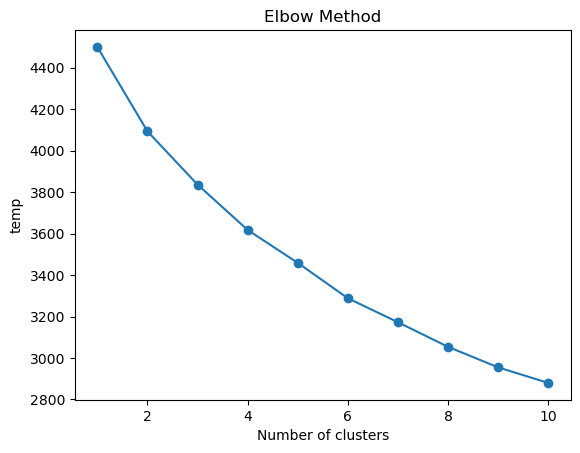

In [82]:
from sklearn.cluster import KMeans
temp = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    temp.append(kmeans.inertia_)

plt.plot(range(1, 11), temp, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("temp")
plt.show()



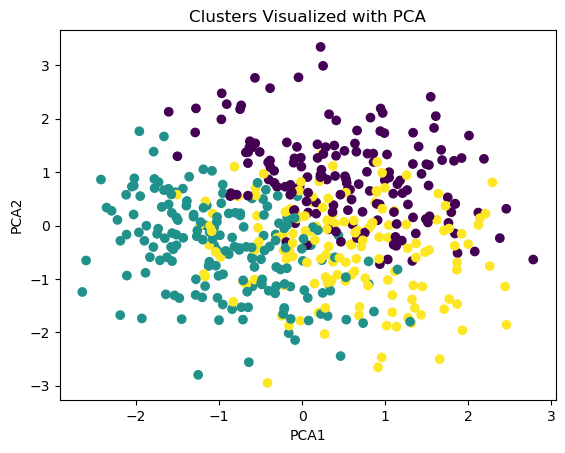

In [84]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters Visualized with PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

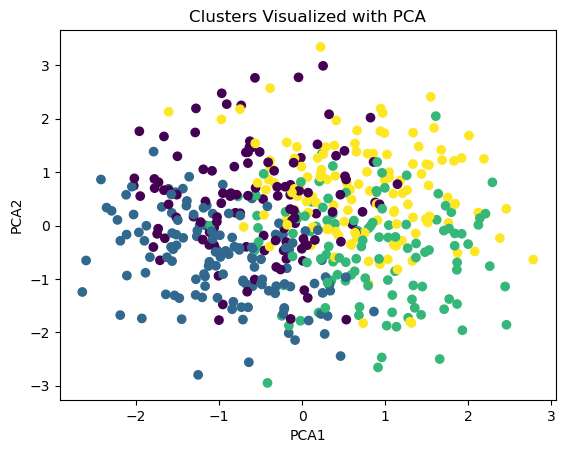

In [93]:
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters Visualized with PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

2.hierarchical cluster

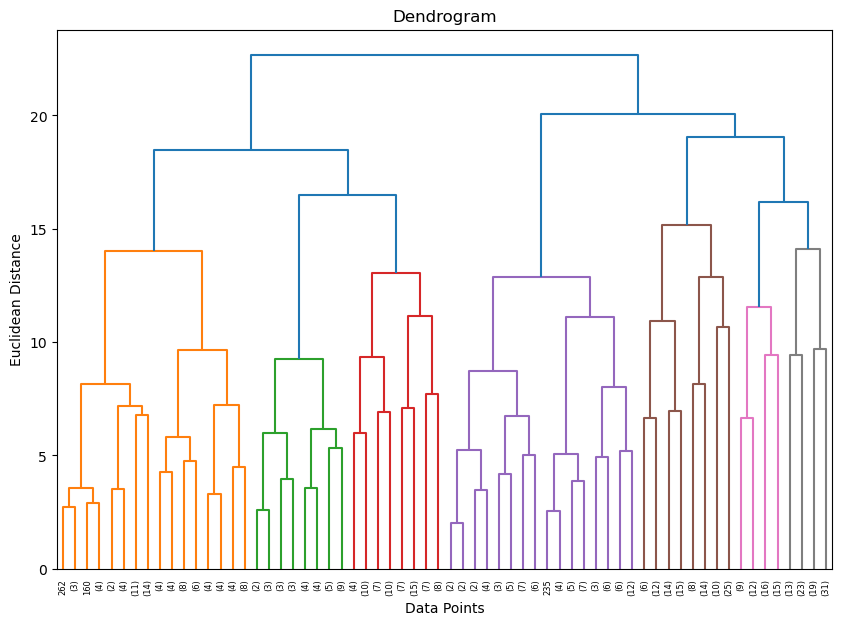

In [97]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_matrix = linkage(scaled_data, method='ward')

# Ploting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="level", p=5)  # 'p' controls the depth of the tree
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

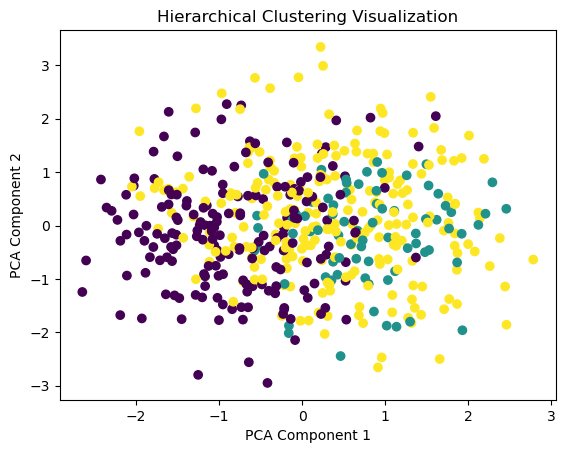

In [101]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Scatter plot of clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title("Hierarchical Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


3.DBSCAN

Cluster Labels: [-1]
Cluster
-1    500
Name: count, dtype: int64


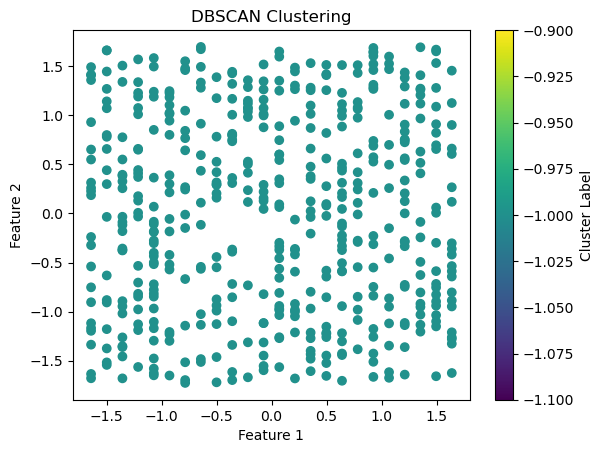

In [105]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  
clusters = dbscan.fit_predict(scaled_data)
data['Cluster'] = clusters

print("Cluster Labels:", np.unique(clusters))
print(data['Cluster'].value_counts())

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()


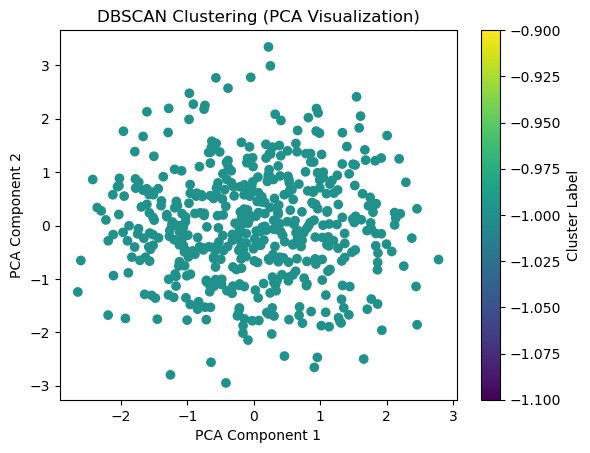

In [107]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Scatter plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()
